#### CNN
#### 1-D CNN은 문장 전체를 한꺼번에 한 방향으로 길이 7짜리 필터로 스캐닝 하면서 7단어 이내에서 발견되는 특징을 추출하여 그것으로 문장을 분류하는 방식

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

#model.summary()

#### CNN
#### 전체 문장 중에서 단 하나의 가장 중요한 단어만 피처로 추출하여 그것으로 문장의 긍정/부정을 평가하는 방식

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

#model.summary()

In [22]:
# validation set 5000건 분리
x_val = x_train[:5000]   
y_val = y_train[:5000]

# validation set을 제외한 나머지 5000건
partial_x_train = x_train[5000:]  
partial_y_train = y_train[5000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(20000, 580)
(20000,)


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
40/40 [==============================] - 2s 10ms/step - loss: 0.6896 - accuracy: 0.6842 - val_loss: 0.6835 - val_accuracy: 0.7634
Epoch 2/20
40/40 [==============================] - 0s 7ms/step - loss: 0.6721 - accuracy: 0.7606 - val_loss: 0.6575 - val_accuracy: 0.7666
Epoch 3/20
40/40 [==============================] - 0s 6ms/step - loss: 0.6340 - accuracy: 0.7847 - val_loss: 0.6106 - val_accuracy: 0.7850
Epoch 4/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5731 - accuracy: 0.8101 - val_loss: 0.5468 - val_accuracy: 0.8110
Epoch 5/20
40/40 [==============================] - 0s 5ms/step - loss: 0.5010 - accuracy: 0.8345 - val_loss: 0.4842 - val_accuracy: 0.8252
Epoch 6/20
40/40 [==============================] - 0s 5ms/step - loss: 0.4344 - accuracy: 0.8511 - val_loss: 0.4341 - val_accuracy: 0.8332
Epoch 7/20
40/40 [==============================] - 0s 5ms/step - loss: 0.3807 - accuracy: 0.8630 - val_loss: 0.3982 - val_accuracy: 0.8442
Epoch 8/20
40/40 [=

In [24]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)

782/782 - 1s - loss: 0.3807 - accuracy: 0.8397
[0.3807080090045929, 0.839680016040802]


In [25]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


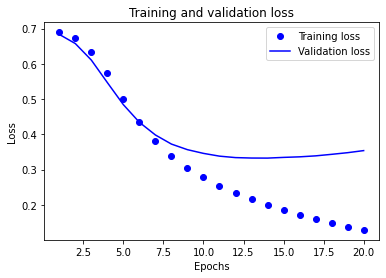

In [26]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

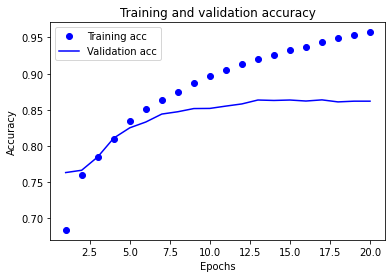

In [27]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 16)


In [72]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [73]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector

KeyError: "Key 'computer' not present"

In [31]:
word_vectors.similar_by_word("love")

[('corbin', 0.978797972202301),
 ('comics', 0.9753194451332092),
 ('ferry', 0.9637885093688965),
 ('sixties', 0.962763786315918),
 ('relevant', 0.9594209790229797),
 ('andrew', 0.9589475989341736),
 ('captured', 0.9586904644966125),
 ('pilot', 0.9581359028816223),
 ('rides', 0.9559658169746399),
 ('freaky', 0.9555756449699402)]

In [74]:
import numpy as np
import os
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [33]:
# 메모리를 다소 많이 소비하는 작업이니 유의해 주세요.
word2vec.similar_by_word("love")

[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [34]:
import numpy as np
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)


import numpy as np
import tensorflow as tf
import os

imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print("훈련 샘플 개수: {}, 테스트 개수: {}".format(len(x_train), len(x_test)))

word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

훈련 샘플 개수: 25000, 테스트 개수: 25000
the
1


In [36]:
# 학습의 진행
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
40/40 [==============================] - 7s 77ms/step - loss: 0.7020 - accuracy: 0.5095 - val_loss: 0.6904 - val_accuracy: 0.5328
Epoch 2/20
40/40 [==============================] - 3s 65ms/step - loss: 0.6705 - accuracy: 0.5968 - val_loss: 0.6708 - val_accuracy: 0.5858
Epoch 3/20
40/40 [==============================] - 3s 65ms/step - loss: 0.5917 - accuracy: 0.7140 - val_loss: 0.5410 - val_accuracy: 0.7512
Epoch 4/20
40/40 [==============================] - 3s 66ms/step - loss: 0.3981 - accuracy: 0.8382 - val_loss: 0.3734 - val_accuracy: 0.8384
Epoch 5/20
40/40 [==============================] - 3s 66ms/step - loss: 0.2571 - accuracy: 0.8999 - val_loss: 0.3222 - val_accuracy: 0.8648
Epoch 6/20
40/40 [==============================] - 3s 66ms/step - loss: 0.1900 - accuracy: 0.9291 - val_loss: 0.3333 - val_accuracy: 0.8594
Epoch 7/20
40/40 [==============================] - 3s 66ms/step - loss: 0.1409 - accuracy: 0.9524 - val_loss: 0.3251 - val_accuracy: 0.8648
Epoch 8/20
40

In [51]:
# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test, y_test, verbose=2)

print(results)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

# Downgrade of gensim version

### 반드시 3.8.3버전이여야함

In [4]:
!pip install --upgrade gensim==3.8.3 --user

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=24328218 sha256=79c844e15a3cf8d4e3af60995411f53e09c989a8a47178636dd6e569cdf17f0f
  Stored in directory: /aiffel/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim


# Restart kernel

# 네이버 영화리뷰 감성분석

In [1]:
import os
import konlpy
import gensim
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from konlpy.tag import Mecab
from collections import Counter

import gensim
from gensim.models import KeyedVectors
from gensim.models.keyedvectors import Word2VecKeyedVectors

from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [4]:
def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

In [5]:
x_train, y_train, x_test, y_test, word_to_index = load_data(train_data, test_data)

In [6]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [7]:
index_to_word

{0: '<PAD>',
 1: '<BOS>',
 2: '<UNK>',
 3: '<UNUSED>',
 4: '.',
 5: '영화',
 6: '다',
 7: '고',
 8: '하',
 9: '을',
 10: '보',
 11: '..',
 12: '게',
 13: ',',
 14: '!',
 15: '지',
 16: '있',
 17: '없',
 18: '?',
 19: '좋',
 20: '나',
 21: '었',
 22: '만',
 23: '는데',
 24: '너무',
 25: '봤',
 26: '적',
 27: '안',
 28: '정말',
 29: '로',
 30: '음',
 31: '것',
 32: '아',
 33: '네요',
 34: '재밌',
 35: '어',
 36: '같',
 37: '점',
 38: '지만',
 39: '진짜',
 40: '했',
 41: '에서',
 42: '기',
 43: '네',
 44: '않',
 45: '거',
 46: '았',
 47: '수',
 48: '되',
 49: '면',
 50: 'ㅋㅋ',
 51: '말',
 52: '연기',
 53: '인',
 54: '주',
 55: '내',
 56: '최고',
 57: '~',
 58: '평점',
 59: '이런',
 60: '던',
 61: '어요',
 62: '할',
 63: '왜',
 64: '겠',
 65: '1',
 66: '스토리',
 67: '해',
 68: '습니다',
 69: 'ㅋㅋㅋ',
 70: '...',
 71: '드라마',
 72: '생각',
 73: '아니',
 74: '더',
 75: '그',
 76: '싶',
 77: '사람',
 78: '듯',
 79: '때',
 80: '감동',
 81: '함',
 82: '배우',
 83: '본',
 84: '까지',
 85: '뭐',
 86: '알',
 87: '만들',
 88: '내용',
 89: '볼',
 90: '감독',
 91: '보다',
 92: '라',
 93: '그냥',
 94: '재미',
 95

In [8]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [9]:
total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2.5* np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens) / len(num_tokens)))

문장길이 평균 :  15.96940191154864
문장길이 최대 :  116
문장길이 표준편차 :  12.843571191092
pad_sequences maxlen :  48
전체 문장의 0.9548784420929768%가 maxlen 설정값 이내에 포함됩니다. 


In [10]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)

(146182, 48)


In [11]:
print(x_train.shape)
print(x_test.shape)

(146182, 48)
(49157, 48)


In [12]:
x_val = x_train[:50000]   
y_val = y_train[:50000]

partial_x_train = x_train[50000:]  
partial_y_train = y_train[50000:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(96182, 48)
(96182,)


# LSTM

In [30]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 128  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(word_vector_dim))
#model.add(tf.keras.layers.LSTM(word_vector_dim, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(tf.keras.layers.Dense(32, activation='relu')) #ely # gelu
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,415,745
Trainable params: 1,415,745
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_bast_only=True)

In [34]:
lstm_history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    callbacks=[early, check],
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
3006/3006 [==============================] - 23s 7ms/step - loss: 0.4286 - accuracy: 0.7936 - val_loss: 0.3451 - val_accuracy: 0.8481

Epoch 00001: saving model to best_model.h5
Epoch 2/20
3006/3006 [==============================] - 20s 7ms/step - loss: 0.3027 - accuracy: 0.8722 - val_loss: 0.3258 - val_accuracy: 0.8618

Epoch 00002: saving model to best_model.h5
Epoch 3/20
3006/3006 [==============================] - 20s 7ms/step - loss: 0.2542 - accuracy: 0.8956 - val_loss: 0.3296 - val_accuracy: 0.8600

Epoch 00003: saving model to best_model.h5
Epoch 4/20
3006/3006 [==============================] - 20s 7ms/step - loss: 0.2161 - accuracy: 0.9130 - val_loss: 0.3551 - val_accuracy: 0.8582

Epoch 00004: saving model to best_model.h5
Epoch 5/20
3006/3006 [==============================] - 20s 7ms/step - loss: 0.1850 - accuracy: 0.9265 - val_loss: 0.3889 - val_accuracy: 0.8555

Epoch 00005: saving model to best_model.h5
Epoch 6/20
3006/3006 [==============================] -

In [35]:
loaded_model = load_model('best_model.h5')
results = loaded_model.evaluate(x_test,  y_test, verbose=2)

print(results)

1537/1537 - 4s - loss: 0.4800 - accuracy: 0.8455
[0.48000723123550415, 0.8455153703689575]


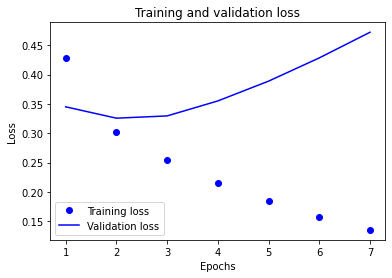

In [36]:
lstm_history_dict = lstm_history.history

acc = lstm_history_dict['accuracy']
val_acc = lstm_history_dict['val_accuracy']
loss = lstm_history_dict['loss']
val_loss = lstm_history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

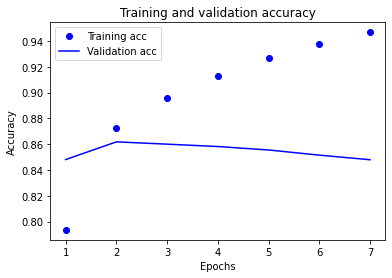

In [37]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

(10000, 128)


In [39]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/lstm_word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [40]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['책']
vector

array([ 0.0410421 , -0.03557734,  0.23023087,  0.13344017, -0.06265446,
       -0.04138776,  0.07443991, -0.03597211,  0.09276123,  0.12618917,
        0.07629108, -0.08525914,  0.1637648 , -0.08052856, -0.13801068,
       -0.09211117,  0.0591465 ,  0.14218575,  0.03427684, -0.0345333 ,
       -0.15186241, -0.02709284, -0.14141135, -0.17879869,  0.07143325,
       -0.21748638,  0.18153732,  0.08756524,  0.21843277,  0.07832138,
        0.064233  , -0.20111921, -0.0777977 ,  0.14955015,  0.03779615,
       -0.22868659, -0.07593223,  0.10268728, -0.08415524, -0.24425617,
        0.1209643 ,  0.16604875, -0.11231235, -0.11849495,  0.11322205,
        0.09461498, -0.10858673, -0.06654204, -0.05546333, -0.15713328,
       -0.11830739,  0.03394357,  0.07418104, -0.00699004, -0.2496173 ,
        0.15144373,  0.01389271,  0.05061735,  0.05618791, -0.02884978,
       -0.0498045 ,  0.03520366, -0.00661419, -0.16105008,  0.26337525,
        0.06149898, -0.12752737, -0.17514427, -0.17608008, -0.05

In [41]:
word_vectors.similar_by_word("기술")

[('셜', 0.8353965282440186),
 ('특집', 0.8289926648139954),
 ('무기', 0.7969644665718079),
 ('배려', 0.78850257396698),
 ('여기저기', 0.7700244784355164),
 ('소원', 0.7644658088684082),
 ('여고', 0.7552447319030762),
 ('무공', 0.7532473206520081),
 ('꼈', 0.7523561120033264),
 ('하드', 0.7480185627937317)]

# 한국어 Word2Vec

In [2]:
import gensim
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/ko.bin'
word2vec = gensim.models.Word2Vec.load(word2vec_path)
vector = word2vec['책']
vector

/tmp/ipykernel_202/3964717862.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec['책']


array([-9.24112797e-01, -2.74529052e+00,  1.06728232e+00,  2.39676952e+00,
       -3.31463963e-01, -2.36547247e-01,  8.48686457e-01,  1.17664254e+00,
       -1.06397021e+00,  5.89810610e-02,  2.63902426e-01,  2.85033405e-01,
       -8.94458234e-01, -1.58449006e+00,  5.93542099e-01, -4.41920385e-02,
        7.08026230e-01,  1.92255616e-01,  1.32107568e+00, -9.41197574e-01,
        5.34274280e-01,  8.45644832e-01, -6.48017824e-01,  1.79611993e+00,
       -6.16020262e-01,  5.25178730e-01, -6.53352022e-01, -1.74194837e+00,
       -1.81069744e+00,  2.44725657e+00, -8.36067833e-04, -1.23918533e+00,
        6.59488976e-01, -1.07028139e+00, -4.56190586e-01,  2.36096454e+00,
       -1.20299995e+00,  7.25756228e-01,  1.03958189e+00,  9.02564406e-01,
       -4.67327029e-01,  1.56743079e-01,  2.83845782e+00, -1.32409072e+00,
        2.47615159e-01,  8.60189259e-01, -2.70138562e-01, -2.83162504e-01,
        8.46812904e-01, -7.90044129e-01,  5.15444815e-01,  7.25791872e-01,
        2.18262768e+00, -

In [43]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 256  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(word_vector_dim, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(tf.keras.layers.LSTM(word_vector_dim, return_sequences=True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(tf.keras.layers.Dense(128, activation='elu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 256)         525312    
_________________________________________________________________
dense_6 (Dense)              (None, None, 128)         32896     
_________________________________________________________________
dense_7 (Dense)              (None, None, 1)           129       
Total params: 3,643,649
Trainable params: 3,643,649
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
check = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_bast_only=True)

In [ ]:
lstm_history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    callbacks=[early, check],
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
 654/3006 [=====>........................] - ETA: 15:21 - loss: 0.4990 - accuracy: 0.7510

In [ ]:
loaded_model = load_model('best_model.h5')
results = loaded_model.evaluate(x_test,  y_test, verbose=2)

print(results)

# 1-D CNN

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()